# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [3]:

np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [4]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

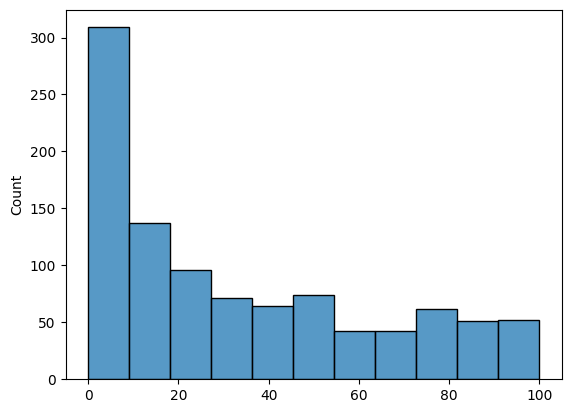

In [5]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [7]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

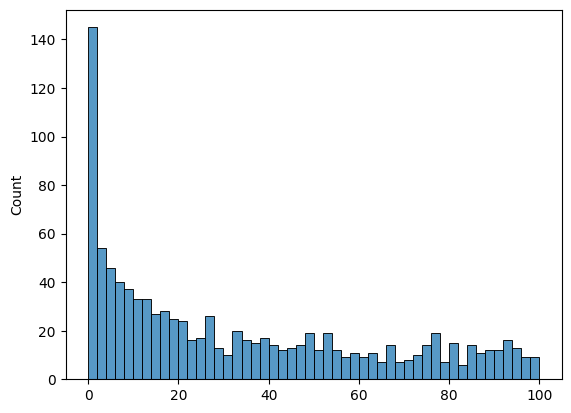

In [9]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

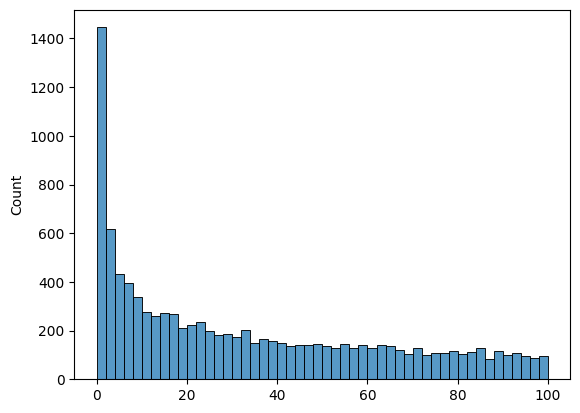

In [10]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

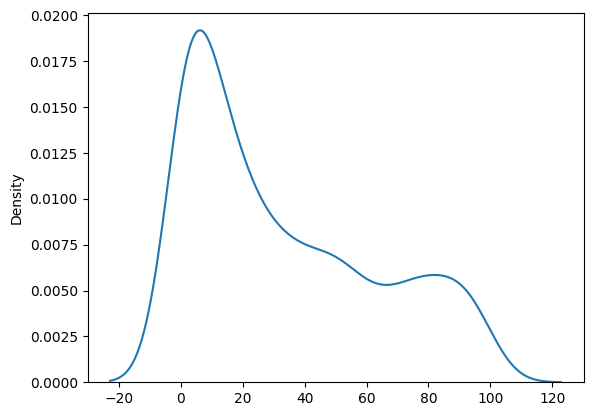

In [11]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

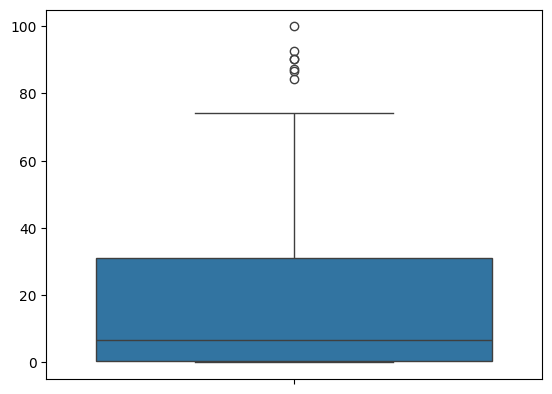

In [12]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

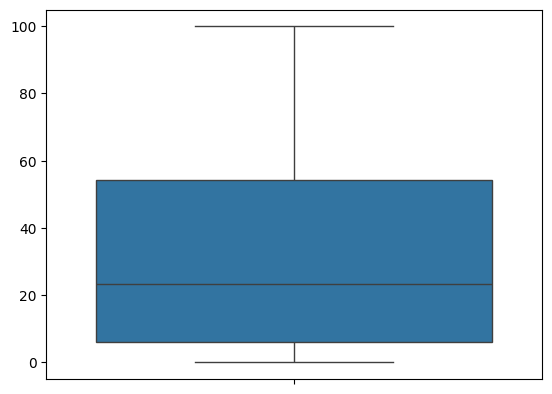

In [13]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

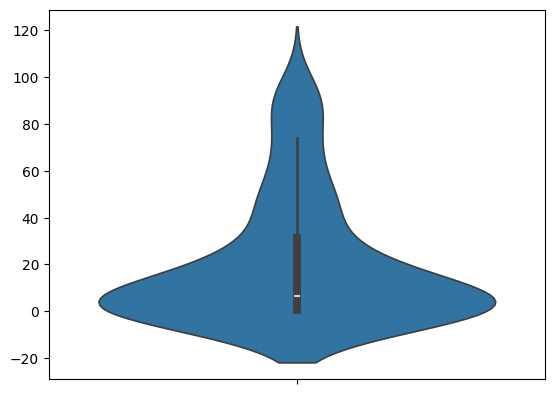

In [14]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

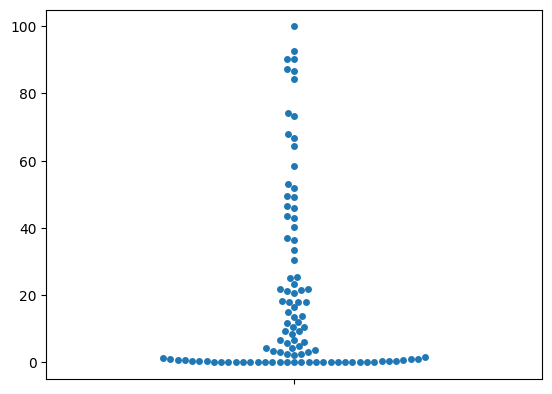

In [15]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [16]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [17]:

histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [ ]:

pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

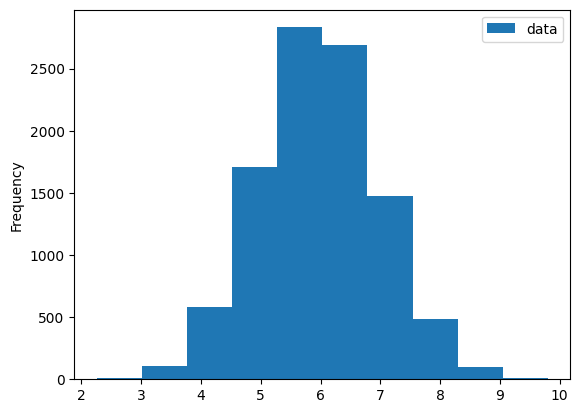

In [ ]:

df.plot.hist()

Histogram
Pros:
Visual Appeal: Histograms provide a visual representation that is easy to understand at a glance.

Distribution Insight: They clearly show the distribution of data, including patterns, trends, and outliers.

Quick Comparison: It's easier to compare the frequency of different ranges in the data.

Cons:
Detail Limitation: Histograms may not provide detailed numerical information for each bin.

Fixed Bins: The choice of bin width can impact the visualization, potentially masking important details.

Table
Pros:
Detailed Information: Tables provide precise numerical data, including counts and range values for each bin.

Specific Comparisons: They allow for exact comparisons of numerical values.

Cons:
Less Visual: Tables are less engaging and more difficult to interpret quickly compared to histograms.

Data Overload: Large tables can be overwhelming and harder to read at a glance.

Recommendation
I would choose the histogram for its ability to quickly convey the distribution of data, which is particularly useful for identifying patterns and trends. However, including the table as a complementary representation can provide detailed numerical information for deeper analysis.

Suggested Formatting Modifications
Histogram:

Add axis labels to clarify what the x and y axes represent (e.g., "Body Length (inches)" and "Frequency").

Include a title for the histogram (e.g., "Distribution of Bird Body Lengths").

Use color to make the bars more visually appealing and distinguishable.

Table:

Add column headers for clarity (e.g., "Count", "Min Length (inches)", "Max Length (inches)").

Highlight alternating rows for better readability.

Include a summary row to show total counts or averages if applicable.

# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [ ]:

num_visits = 10000
np.random.seed(0)

In [ ]:

df = pd.DataFrame(columns = ["VisitDate"])

In [ ]:

start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [ ]:

df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [ ]:

df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [ ]:

df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [ ]:

df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [ ]:

df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [ ]:

df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65



1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

In [30]:



# Calculate mean, median, and mode for Martian Ride
martian_mean = df['MartianRide'].mean()
martian_median = df['MartianRide'].median()
martian_mode = df['MartianRide'].mode()[0]

# Calculate mean, median, and mode for Teacup Ride
teacup_mean = df['TeacupRide'].mean()
teacup_median = df['TeacupRide'].median()
teacup_mode = df['TeacupRide'].mode()[0]

# Calculate mean, median, and mode for River Ride
river_mean = df['RiverRide'].mean()
river_median = df['RiverRide'].median()
river_mode = df['RiverRide'].mode()[0]

# Display the results
print("Martian Ride - Mean:", martian_mean, "Median:", martian_median, "Mode:", martian_mode)
print("Teacup Ride - Mean:", teacup_mean, "Median:", teacup_median, "Mode:", teacup_mode)
print("River Ride - Mean:", river_mean, "Median:", river_median, "Mode:", river_mode)


Martian Ride - Mean: 0.9073 Median: 0.0 Mode: 0
Teacup Ride - Mean: 0.5862 Median: 0.0 Mode: 0
River Ride - Mean: 1.2007 Median: 1.0 Mode: 0


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [39]:


# Function to calculate mean, median, and mode for each ride
def calculate_statistics(df, ride):
    grouped = df.groupby('VisitDate').agg({
        ride: ['mean', 'median', lambda x: stats.mode(x)[0] if not x.empty else np.nan]
    })
    grouped.columns = [f'{ride}_Mean', f'{ride}_Median', f'{ride}_Mode']
    return grouped

# Calculate statistics for each ride
martian_stats = calculate_statistics(df, 'MartianRide')
teacup_stats = calculate_statistics(df, 'TeacupRide')
river_stats = calculate_statistics(df, 'RiverRide')

# Combine results into a single DataFrame
combined_stats = martian_stats.join(teacup_stats).join(river_stats)

# Display the results
print(combined_stats.head())




            MartianRide_Mean  MartianRide_Median  MartianRide_Mode  \
VisitDate                                                            
2010-01-01              0.75                 0.0                 0   
2010-01-02              0.00                 0.0                 0   
2010-01-03              0.00                 0.0                 0   
2010-01-04              0.00                 0.0                 0   
2010-01-05              0.50                 0.5                 0   

            TeacupRide_Mean  TeacupRide_Median  TeacupRide_Mode  \
VisitDate                                                         
2010-01-01             0.25                0.0                0   
2010-01-02             1.00                1.0                1   
2010-01-03             1.50                0.5                0   
2010-01-04             0.00                0.0                0   
2010-01-05             0.00                0.0                0   

            RiverRide_Mean  RiverRide_M

3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [40]:


# Function to calculate standard deviation and variance for each ride
def calculate_std_var(df, ride):
    grouped = df.groupby('VisitDate')[ride].count()
    std_dev = grouped.std()
    variance = grouped.var()
    return std_dev, variance

# Calculate standard deviation and variance for each ride
martian_std, martian_var = calculate_std_var(df, 'MartianRide')
teacup_std, teacup_var = calculate_std_var(df, 'TeacupRide')
river_std, river_var = calculate_std_var(df, 'RiverRide')

# Display the results
print("Martian Ride - Standard Deviation:", martian_std, "Variance:", martian_var)
print("Teacup Ride - Standard Deviation:", teacup_std, "Variance:", teacup_var)
print("River Ride - Standard Deviation:", river_std, "Variance:", river_var)


Martian Ride - Standard Deviation: 1.2406698958966151 Variance: 1.539261790584118
Teacup Ride - Standard Deviation: 1.2406698958966151 Variance: 1.539261790584118
River Ride - Standard Deviation: 1.2406698958966151 Variance: 1.539261790584118


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [41]:


# Calculate the 90th percentile for each ride
martian_90th = df['MartianRide'].quantile(0.90)
teacup_90th = df['TeacupRide'].quantile(0.90)
river_90th = df['RiverRide'].quantile(0.90)

# Display the results
print("Martian Ride - 90th Percentile Count:", martian_90th)
print("Teacup Ride - 90th Percentile Count:", teacup_90th)
print("River Ride - 90th Percentile Count:", river_90th)


Martian Ride - 90th Percentile Count: 2.0
Teacup Ride - 90th Percentile Count: 2.0
River Ride - 90th Percentile Count: 3.0


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

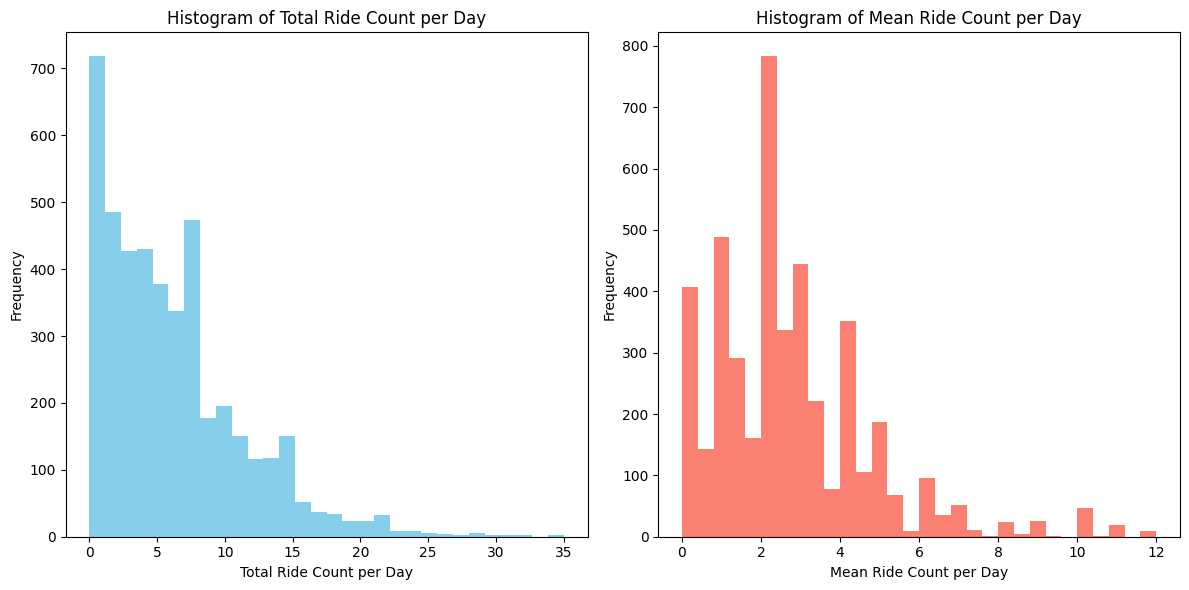

In [42]:

# Calculate total ride count for each day
df['TotalRideCount'] = df[['MartianRide', 'TeacupRide', 'RiverRide']].sum(axis=1)
daily_total = df.groupby('VisitDate')['TotalRideCount'].sum()

# Calculate mean ride count for each day
daily_mean = df.groupby('VisitDate')['TotalRideCount'].mean()

# Plot histogram for total ride count
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(daily_total, bins=30, color='skyblue')
plt.xlabel('Total Ride Count per Day')
plt.ylabel('Frequency')
plt.title('Histogram of Total Ride Count per Day')

# Plot histogram for mean ride count
plt.subplot(1, 2, 2)
plt.hist(daily_mean, bins=30, color='salmon')
plt.xlabel('Mean Ride Count per Day')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Ride Count per Day')

plt.tight_layout()
plt.show()


6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

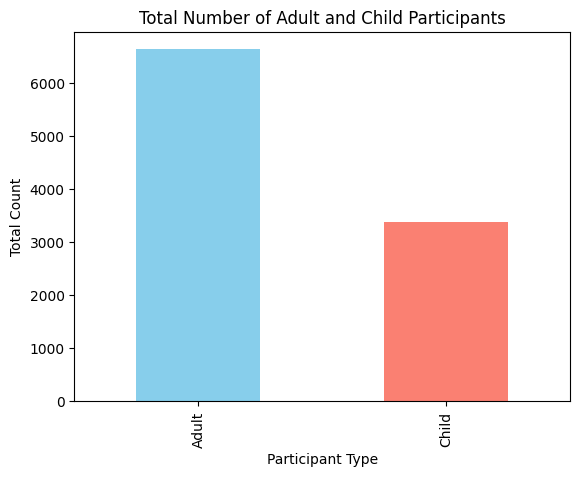

In [43]:


# Count the number of adults and children
participant_counts = df['IsAdult'].value_counts()
participant_counts.index = ['Adult', 'Child']

# Plot a bar chart
participant_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Participant Type')
plt.ylabel('Total Count')
plt.title('Total Number of Adult and Child Participants')
plt.show()


7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

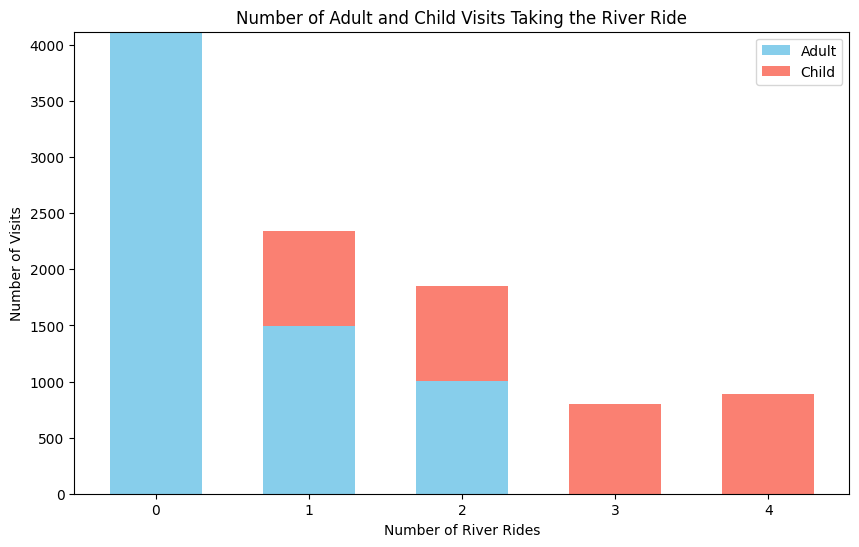

In [44]:


# Separate the data for adults and children
adults = df[df['IsAdult'] == True]
children = df[df['IsAdult'] == False]

# Count the number of visits for each ride count
adult_counts = adults['RiverRide'].value_counts().sort_index()
child_counts = children['RiverRide'].value_counts().sort_index()

# Align the indices to ensure both series have the same index range
index_range = range(max(adult_counts.index.max(), child_counts.index.max()) + 1)
adult_counts = adult_counts.reindex(index_range, fill_value=0)
child_counts = child_counts.reindex(index_range, fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.6
plt.bar(adult_counts.index, adult_counts, label='Adult', color='skyblue', width=bar_width)
plt.bar(child_counts.index, child_counts, bottom=adult_counts, label='Child', color='salmon', width=bar_width)
plt.xlabel('Number of River Rides')
plt.ylabel('Number of Visits')
plt.title('Number of Adult and Child Visits Taking the River Ride')
plt.legend()
plt.show()


8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

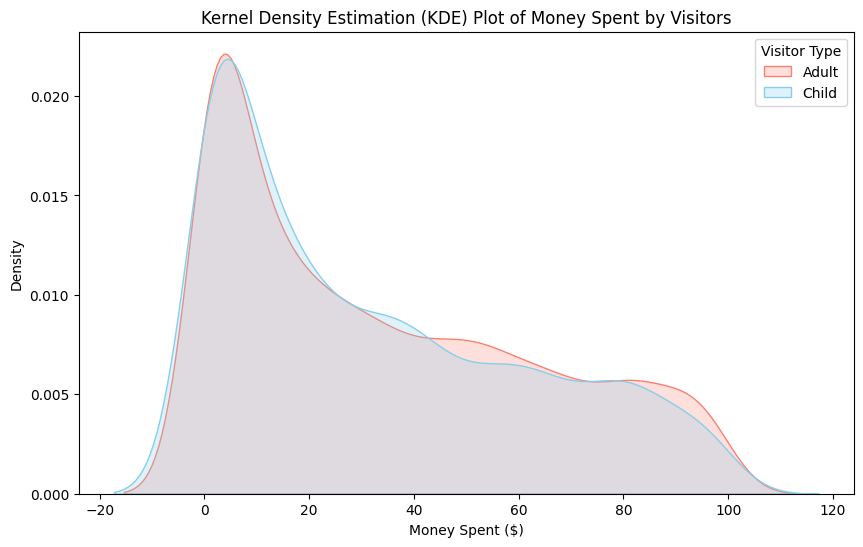

In [45]:



# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MoneySpent', hue='IsAdult', fill=True, common_norm=False, palette=['skyblue', 'salmon'])
plt.xlabel('Money Spent ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Money Spent by Visitors')
plt.legend(title='Visitor Type', labels=['Adult', 'Child'])
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_42160\2273193429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.4% of the points cannot be 

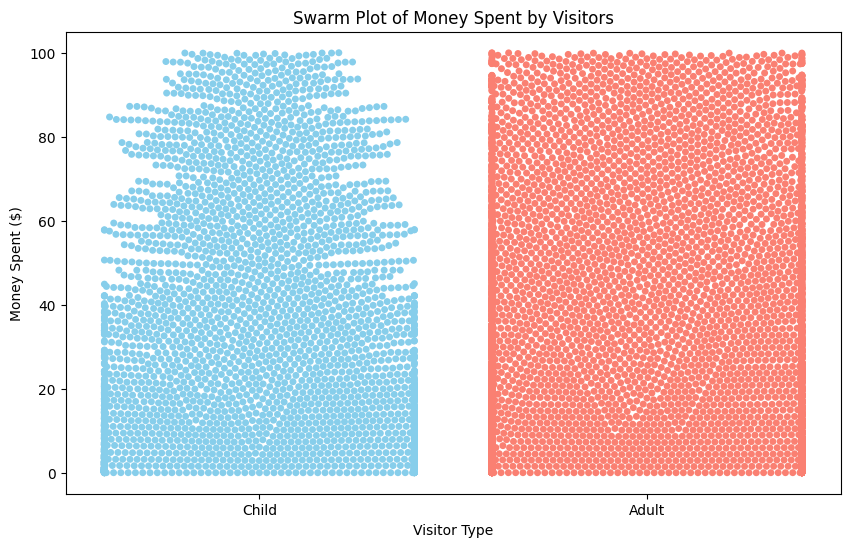

In [46]:


# Swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])
plt.xlabel('Visitor Type')
plt.ylabel('Money Spent ($)')
plt.title('Swarm Plot of Money Spent by Visitors')
plt.xticks([0, 1], ['Child', 'Adult'])
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_42160\4266844836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])


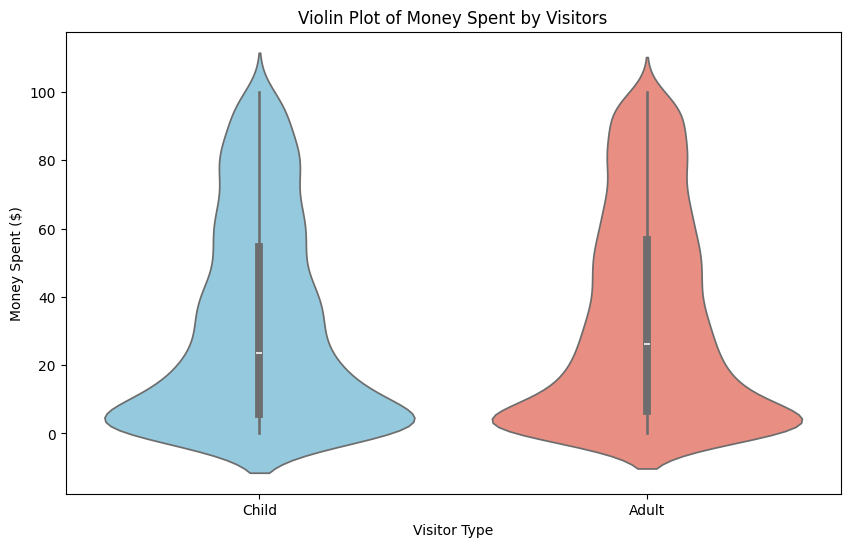

In [47]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])
plt.xlabel('Visitor Type')
plt.ylabel('Money Spent ($)')
plt.title('Violin Plot of Money Spent by Visitors')
plt.xticks([0, 1], ['Child', 'Adult'])
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_42160\1197415155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])


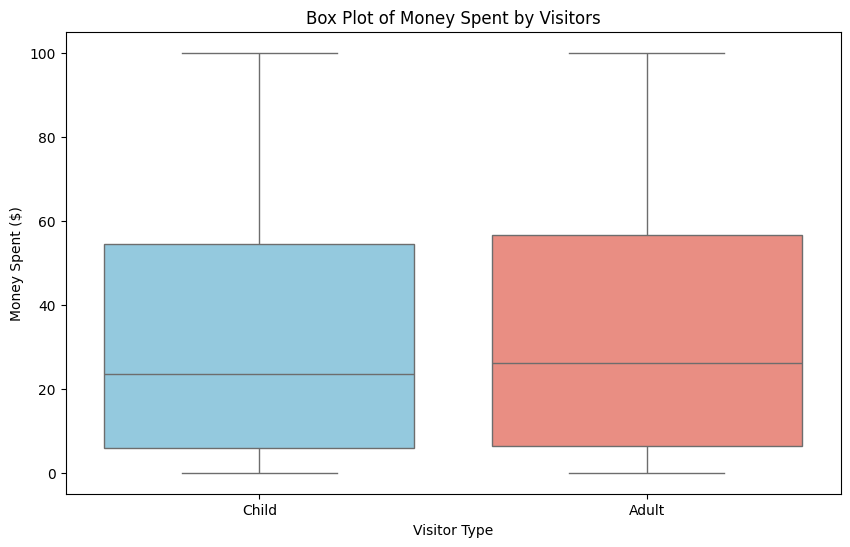

In [48]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='IsAdult', y='MoneySpent', palette=['skyblue', 'salmon'])
plt.xlabel('Visitor Type')
plt.ylabel('Money Spent ($)')
plt.title('Box Plot of Money Spent by Visitors')
plt.xticks([0, 1], ['Child', 'Adult'])
plt.show()


Which plots are best for this data:

Box Plot: If you want a clear summary of the data with quartiles and outliers, the box plot is the most straightforward choice.

Violin Plot: If you need a comprehensive view of data distribution and density, the violin plot is a powerful tool.

Swarm Plot: For visualizing individual data points and their spread, the swarm plot is very effective, though it can get cluttered with large datasets.

KDE Plot: For understanding the overall distribution and comparing groups, the KDE plot offers smooth, intuitive curves.

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

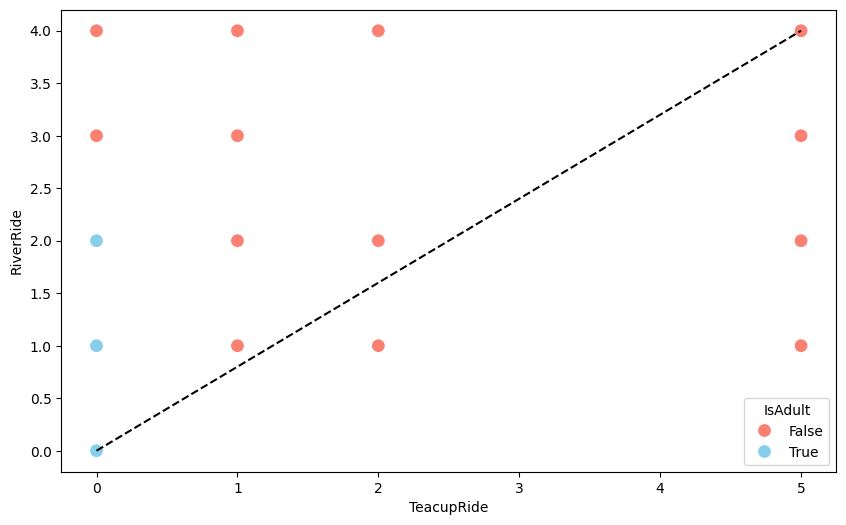

In [50]:


# Focus on the first 100 points
df_sample = df.iloc[:100]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='TeacupRide', y='RiverRide', hue='IsAdult', palette=['salmon', 'skyblue'], s=100)

# Draw the dashed line
plt.plot([0, df_sample['TeacupRide'].max()], [0, df_sample['RiverRide'].max()], 'k--', label='Separator')

# Add the word on